In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Salary_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
x = df['YearsExperience']
y = df['Salary']

In [ ]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x_train.values.reshape(-1,1),y_train)

LinearRegression()

In [ ]:
lr.score(x_test.values.reshape(-1,1),y_test)

0.988169515729126

In [ ]:
lr.predict(([[1]]))

array([35162.41676468])

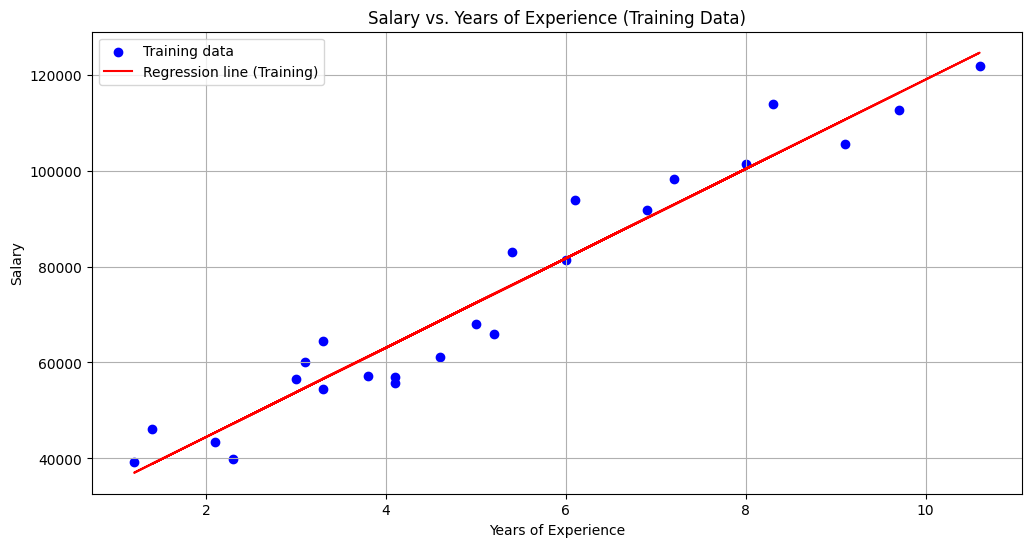

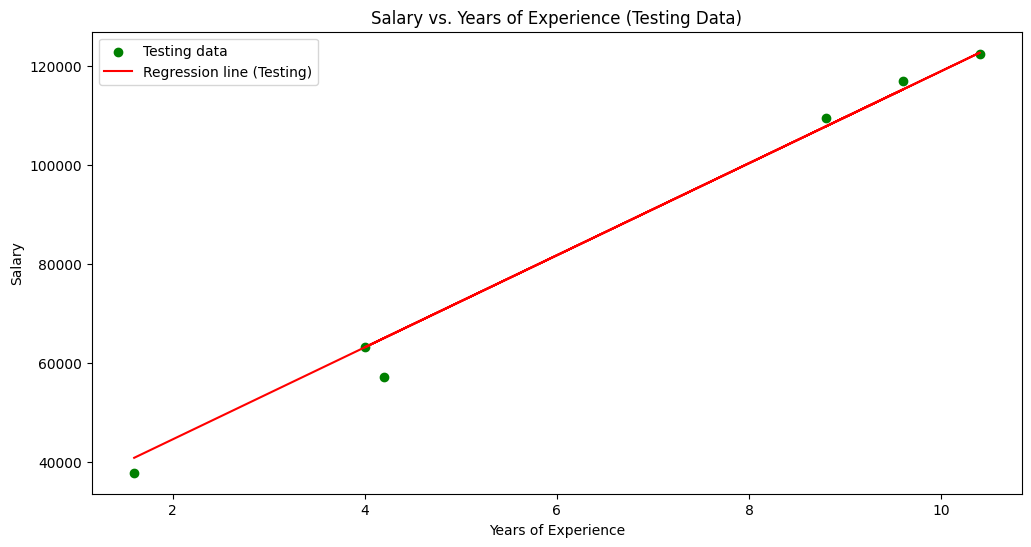

In [ ]:
# Plotting the training data and the fitted line
plt.figure(figsize=(12, 6))

# Scatter plot of the training data
plt.scatter(x_train, y_train, color='blue', label='Training data')

# Plot the regression line on the training data
# We need to use the trained model to predict y values for the training x values
plt.plot(x_train.values.reshape(-1, 1), lr.predict(x_train.values.reshape(-1, 1)), color='red', label='Regression line (Training)')

plt.title('Salary vs. Years of Experience (Training Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the testing data and the fitted line
plt.figure(figsize=(12, 6))

# Scatter plot of the testing data
plt.scatter(x_test, y_test, color='green', label='Testing data')

# Plot the regression line extrapolated to the testing x values
# We use the same trained model to predict y values for the testing x values
plt.plot(x_test.values.reshape(-1, 1), lr.predict(x_test.values.reshape(-1, 1)), color='red', label='Regression line (Testing)')

plt.title('Salary vs. Years of Experience (Testing Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
# plt.grid(True)
plt.show()


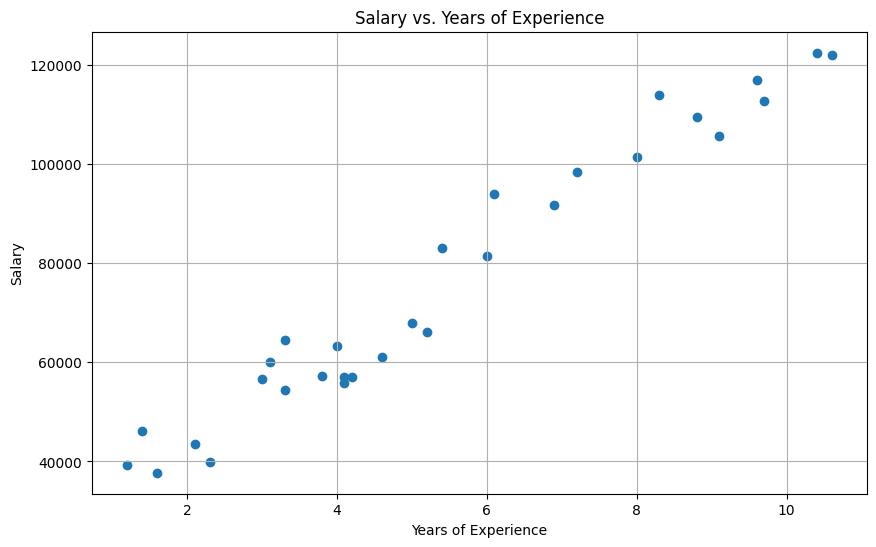

In [ ]:
plt.figure(figsize=(10, 6)) # Optional: Set the figure size
plt.scatter(x, y)
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True) # Optional: Add a grid
plt.show()

In [1]:
!pip install tensorflow

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 📥 Load dataset
df = pd.read_csv('/content/Salary_dataset.csv')
x = df['YearsExperience'].values  # Independent variable
y = df['Salary'].values           # Dependent variable

# 🔄 Reshape input for Keras (expects 2D array)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# 🧠 Create Feedforward Neural Network
model = Sequential([
    Dense(units=1, input_shape=[1])  # Simple linear regression
])

# ⚙️ Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# 🎯 Train the model
model.fit(x, y, epochs=500, verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted salary for 16 years of experience = ₹28.70L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


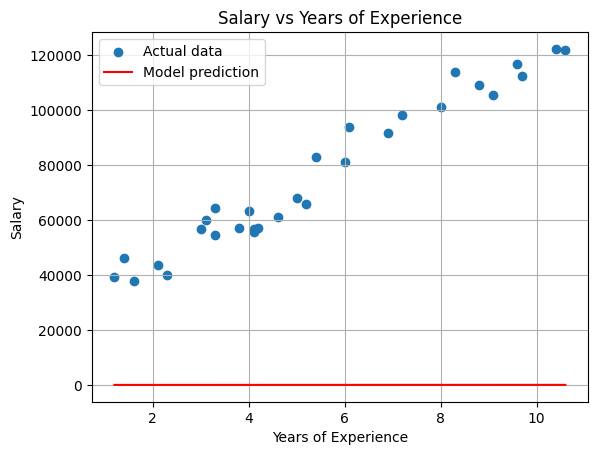

In [21]:

# 📈 Predict for 16 years of experience (not 1600!)
import numpy as np
predicted = model.predict(np.array([[16.0]]))

print(f"Predicted salary for 16 years of experience = ₹{predicted[0][0]:.2f}L")

# 📉 Plot
plt.scatter(x, y, label="Actual data")
plt.plot(x, model.predict(x), color='red', label="Model prediction")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
model.evaluate(x, y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 6501321728.0000


6501321728.0